In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
parameters = ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Diabetes_012']
key_diabetes = diabetes[parameters]

In [4]:
X = key_diabetes.drop(columns = 'Diabetes_012', axis=1)
y = key_diabetes['Diabetes_012']
smote = SMOTE()
X_res, y_res = smote.fit_resample(X,y)
print(y_res.value_counts())

Diabetes_012
0.0    213703
2.0    213703
1.0    213703
Name: count, dtype: int64


In [5]:
X = key_diabetes.drop(columns = 'Diabetes_012', axis=1)
y = key_diabetes['Diabetes_012']
smote = SMOTE()
X_res, y_res = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 1)

print(y_train.value_counts())
X_train.shape

Diabetes_012
0.0    170905
2.0    170905
1.0    170905
Name: count, dtype: int64


(512715, 5)

Text(0, 0.5, 'Accuracy')

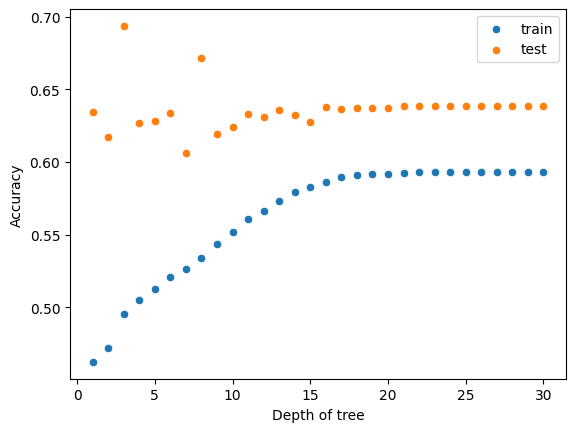

In [6]:
depths = range(1, 31)
train_scores = []
test_scores = []

for depth in depths:
    T = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=depths, y=train_scores, label='train')
sns.scatterplot(x=depths, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')